In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Netflix Dataset.csv")

In [ ]:
# Display basic info
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing values per column:\n", df.isnull().sum())

Dataset shape: (7789, 11)

Columns:
 Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

Missing values per column:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [ ]:
print("🔹 DataFrame Columns:")
for col in df.columns:
    print(repr(col))


🔹 DataFrame Columns:
'show_id'
'category'
'title'
'director'
'cast'
'country'
'release_date'
'rating'
'duration'
'type'
'description'



Top 10 Countries by Number of Titles:
 country
United States     2556
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: count, dtype: int64


/tmp/ipython-input-54569996.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_count.values, y=country_count.index, palette="coolwarm")


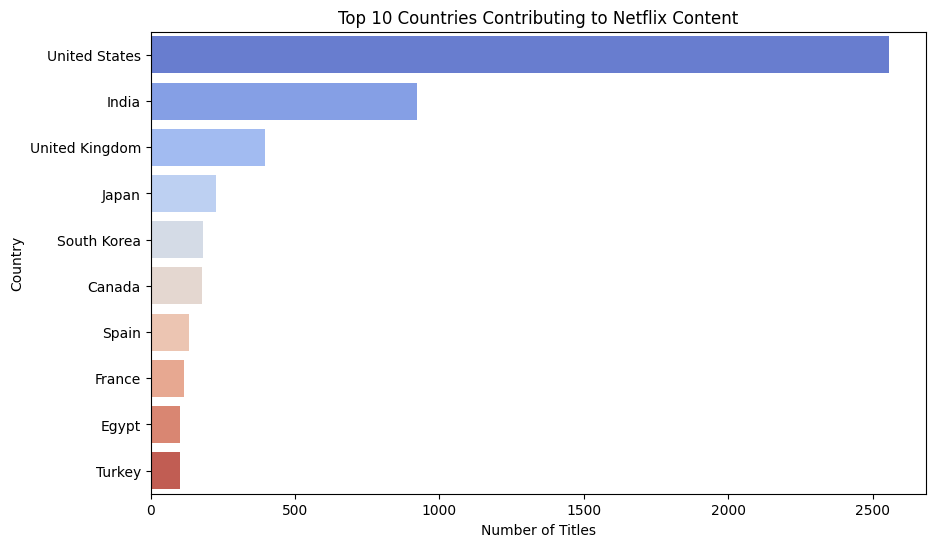

In [ ]:
# --- 3️⃣ Country-wise contribution to Netflix’s catalog ---
country_count = df['country'].value_counts().head(10)
print("\nTop 10 Countries by Number of Titles:\n", country_count)

plt.figure(figsize=(10,6))
sns.barplot(x=country_count.values, y=country_count.index, palette="coolwarm")
plt.title("Top 10 Countries Contributing to Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

In [ ]:
# --- Extra Insights (Optional) ---
# Average duration of movies and TV shows
df['duration'] = df['duration'].astype(str)
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
avg_duration = df.groupby('type')['duration_num'].mean()
print("\nAverage Duration:\n", avg_duration)


Average Duration:
 type
Action & Adventure                                              105.121212
Action & Adventure, Anime Features, Children & Family Movies    102.666667
Action & Adventure, Anime Features, Classic Movies              100.000000
Action & Adventure, Anime Features, Horror Movies                96.000000
Action & Adventure, Anime Features, International Movies         85.964286
                                                                   ...    
TV Horror, TV Mysteries, Teen TV Shows                            1.000000
TV Horror, Teen TV Shows                                          1.000000
TV Sci-Fi & Fantasy, TV Thrillers                                 3.000000
TV Shows                                                          1.000000
Thrillers                                                        97.244898
Name: duration_num, Length: 492, dtype: float64


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3127712315.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


/tmp/ipython-input-3813183250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='mako')


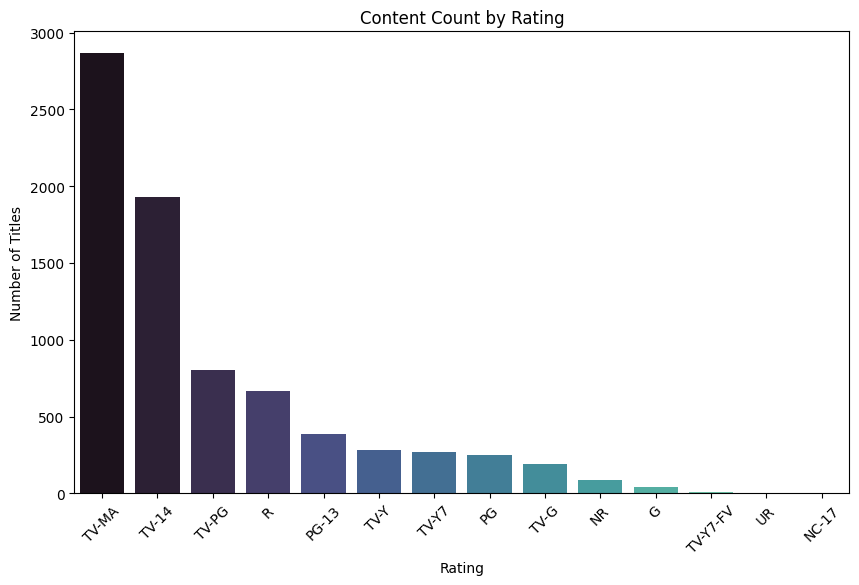

In [ ]:
# Content count by rating
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='mako')
plt.title("Content Count by Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df.columns.tolist())


['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description']


In [ ]:
# Convert release_date to datetime and extract year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year


In [ ]:
# Count top 5 categories
top_categories = df['category'].value_counts()
top5_categories = top_categories.index[:5]

# Filter dataset and group by release year + category
category_trend = df[df['category'].isin(top5_categories)] \
                  .groupby(['release_year', 'category']) \
                  .size().reset_index(name='count')


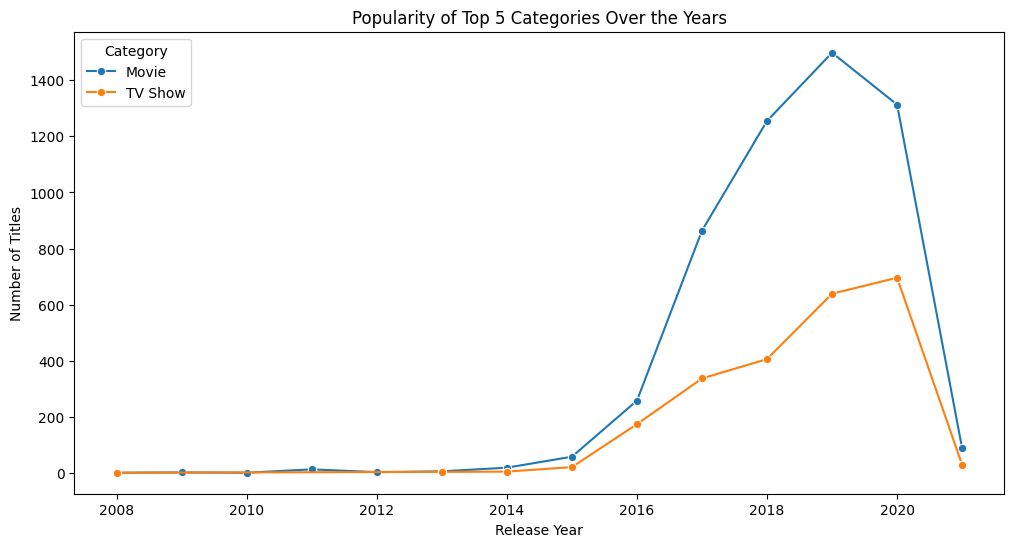

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=category_trend, x='release_year', y='count', hue='category', marker='o')
plt.title("Popularity of Top 5 Categories Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Category")
plt.show()
